In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline



## Section 1: Import and Inspect the Data

In [2]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2: Data Exploration and Preparation


In [3]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

C:\Users\reedb\AppData\Local\Temp\ipykernel_33052\1712063472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [4]:
le = LabelEncoder()
titanic["alone_num"] = le.fit_transform(titanic["alone"])

In [5]:
le = LabelEncoder()
titanic["adult_male_num"] = le.fit_transform(titanic["adult_male"])

## Section 3: Feature Selection and Justification


In [6]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

In [7]:
# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

In [8]:
# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

In [9]:
# Case 4. pclass, alone, adult_male
features = ['pclass', 'alone_num', 'adult_male_num']
X4 = titanic[features]
y4 = titanic['fare']

In [10]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size', 'alone_num', 'adult_male_num'],
      dtype='object')

### Reflection

<b>Why might these features affect a passenger’s fare:</b>    
- age: older people could be more likely to be wealthy and afford more expensive fare
- family_size: larger families may have spent less overall on fare to afford it 

<b>List all available features:</b>  
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'family_size', 'alone_num', 'adult_male_num'],
      dtype='object')  

<b>Which other features could improve predictions and why:</b>  
- survived: I believe first class was more likely to survive, which could also help predict fare
- embark_town: different places could have charged different rates for fare

<b>How many variables are in your Case 4:</b>  
Three  

<b>Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:</b>  
I chose pclass, alone, and adult_male.
- Class should be directly related to how much someone paid for a ticket.
- I earlier graphed fare and sex, and there seemed to be some clusters.
- I am not sure about 'alone' but I am interested to see if it has an impact.  

## Section 4: Train a Regression Model (Linear Regression)


### 4.1 Split the Data

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)

In [12]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [13]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))
print()

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.33566724131426584
Case 4: Test R²: 0.3984170701219
Case 4: Test RMSE: 870.3631451576616
Case 4: Test MAE: 20.442802825203685



### Section 4 Reflection Questions

Compare the train vs test results for each.

<b>Did Case 1 overfit or underfit? Explain:</b>
Case 1 underfit. The train and test R2 is almost zero, so we would see similar performance by just predicting the mean every time.

<b>Did Case 2 overfit or underfit? Explain:</b>  
Underfit: The R2 score of .050 is still low, meaning not much variability in the data is explained by the model.

<b>Did Case 3 overfit or underfit? Explain:</b>  
Underfit: The R2 score of .050 is still low, meaning not much variability in the data is explained by the model.

<b>Did Case 4 overfit or underfit? Explain:</b>
Case 4 could still be underfitting because of the low R2 score, but case 4 has the highest R2 score out of all four cases.

<b>Did adding age improve the model:</b>
Yes  

<b>Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that):</b>
Tickets may cost less for children.

<b> Which case performed the worst:</b> Case 1 (age)
<b>How do you know:</b> Lowest R2, highest MSE
<b>Do you think adding more training data would improve it (and why/why not):</b>  
I do not think adding more training data would improve it because it is underfit to the data and will continue to be underfit.  

<b>Which case performed the best:</b> Case 4
<b>How do you know:</b>  
Case 4 boasts the highest test R2 score and the lowest test MSE.  

<b>Do you think adding more training data would improve it (and why/why not):</b>  
No, the R2 score shows that it may still be underfit.

## Section 5: Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)


### 5.1 Ridge Regression (L2 penalty)

In [14]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

In [15]:
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

In [16]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

In [17]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

Choose a case with just one input feature and plot it.

In [18]:
# Set up the poly inputs
poly1f = PolynomialFeatures(degree=3)
X_train_poly1f = poly.fit_transform(X1_train)
X_test_poly1f = poly.transform(X1_test)

In [19]:
# Use the poly inputs in the LR model
poly_model1f = LinearRegression()
poly_model1f.fit(X_train_poly1f, y1_train)
y_pred_poly1f = poly_model1f.predict(X_test_poly1f)

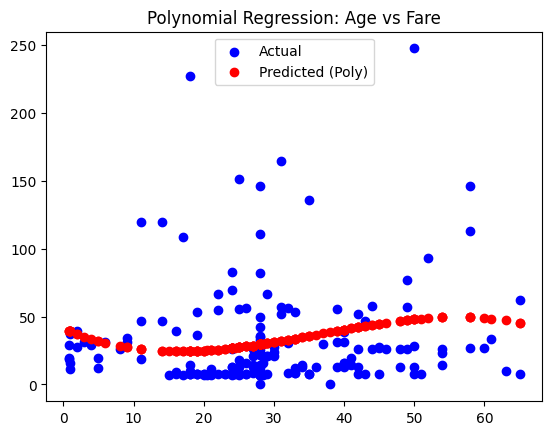

In [20]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly1f, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

In [21]:
print("Case 1: Test R²:", r2_score(y1_test, y_pred_poly1f))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_poly1f))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_poly1f))
print()

Case 1: Test R²: -0.0033041302146616935
Case 1: Test RMSE: 1451.5686781542342
Case 1: Test MAE: 25.30387244573267



### 5.4 Reflections

<b>What patterns does the cubic model seem to capture:</b>  
The line dips towards clusters of data.  
 
<b>Where does it perform well or poorly:</b>  
It performs well when there are groups of data because it changes course to make predictions closer to the group.  

<b>Did the polynomial fit outperform linear regression:</b>  
No, it did not. It has a lower R2 score and a higher MSE than the linear regression.  

<b>Where (on the graph or among which kinds of data points) does it fit best:</b>  
It didn't really fit any data well. It's little better than predicting the mean for every instance. Because of the wide spread of data across y values, classification is likely to be much better for predictions.

### 5.4 Compare All Models 

In [22]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.398
Linear RMSE: 29.50
Linear MAE: 20.44

Ridge R²: 0.399
Ridge RMSE: 29.49
Ridge MAE: 20.40

ElasticNet R²: 0.425
ElasticNet RMSE: 28.85
ElasticNet MAE: 17.40

Polynomial R²: 0.444
Polynomial RMSE: 28.36
Polynomial MAE: 15.95



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)

Use the same single input case as you visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result.

In [23]:
# Set up the poly inputs
poly1f2 = PolynomialFeatures(degree=6)
X_train_poly1f2 = poly1f2.fit_transform(X1_train)
X_test_poly1f2 = poly1f2.transform(X1_test)

In [24]:
# Use the poly inputs in the LR model
poly_model1f2 = LinearRegression()
poly_model1f2.fit(X_train_poly1f2, y1_train)
y_pred_poly1f2 = poly_model1f2.predict(X_test_poly1f2)

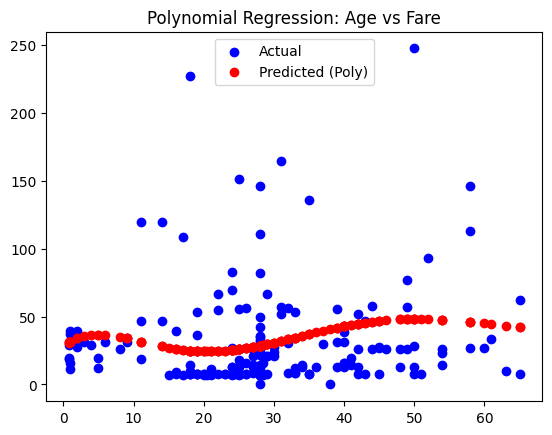

In [25]:
plt.scatter(X1_test, y1_test, color='blue', label='Actual')
plt.scatter(X1_test, y_pred_poly1f2, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare")
plt.show()

In [26]:
print("Case 1:")
print()

print("Polynomial with degree = 3:")
print("Case 1: Test R²:", r2_score(y1_test, y_pred_poly1f))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_poly1f))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_poly1f))
print()

print("Polynomial with degree = 6:")
print("Case 1: Test R²:", r2_score(y1_test, y_pred_poly1f2))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_poly1f2))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_poly1f2))

Case 1:

Polynomial with degree = 3:
Case 1: Test R²: -0.0033041302146616935
Case 1: Test RMSE: 1451.5686781542342
Case 1: Test MAE: 25.30387244573267

Polynomial with degree = 6:
Case 1: Test R²: 3.073596363267761e-05
Case 1: Test RMSE: 1446.7438327813638
Case 1: Test MAE: 25.170051254860578


<b>In a Markdown cell, tell us which option seems to work better - your initial cubic (3) or your higher order and why.</b>  
The intial cubic polynomial regression seems to work better - it has a slightly lower RMSE. They perform similarly overall. It could be that the lower polynomial generalizes better to the data.

## Section 6: Final Thoughts & Insights

### 6.1 Summarize Findings

<b>1. What features were most useful?</b>  
 
Case 4 with the features pclass, alone, and adult_male had the best performance. It had the highest r2 score and lowest RMSE out of all 4 cases.

In [27]:
# Case 1. age
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()

# Case 2. family_size
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print()

# Case 3. age, family_size
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print()

# Case 4. pclass, alone, adult_male
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))
print()

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364

Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641

Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688

Case 4: Training R²: 0.33566724131426584
Case 4: Test R²: 0.3984170701219
Case 4: Test RMSE: 870.3631451576616
Case 4: Test MAE: 20.442802825203685



<b>2. What regression model performed best?</b>  

Polynomial regression with 3 degrees performed the best. It had the highest R2 score and lowest error scores of all tested regression models.

In [28]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.398
Linear RMSE: 29.50
Linear MAE: 20.44

Ridge R²: 0.399
Ridge RMSE: 29.49
Ridge MAE: 20.40

ElasticNet R²: 0.425
ElasticNet RMSE: 28.85
ElasticNet MAE: 17.40

Polynomial R²: 0.444
Polynomial RMSE: 28.36
Polynomial MAE: 15.95



<b>3. How did model complexity or regularization affect results?</b>  

Increased model complexity tends to lead to overfitting. This can be seen with polynomial regression as the number of degrees increases. 

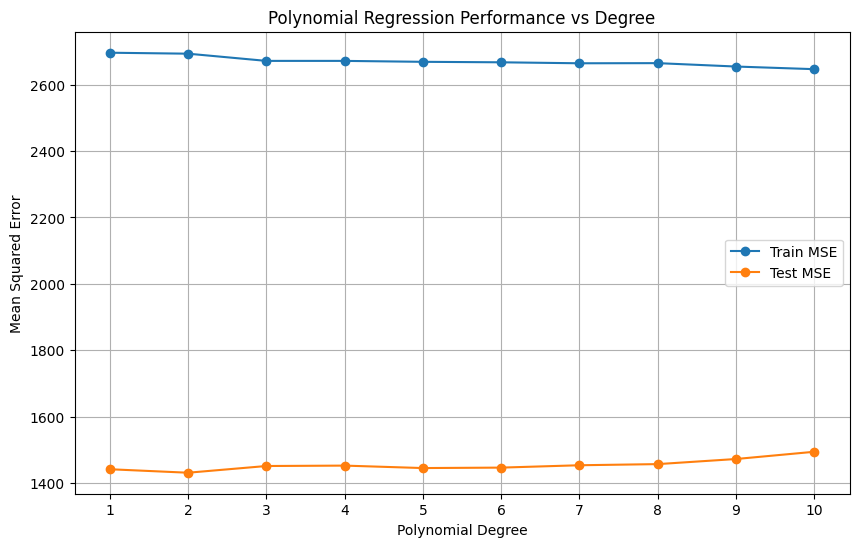

In [29]:
degrees = range(1, 11)   # degrees 1–10
train_mse = []
test_mse = []

for d in degrees:
    # Build pipeline: Polynomial transformer + Linear Regression
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("linreg", LinearRegression())
    ])

    # Fit on training data
    model.fit(X1_train, y1_train)

    # Predictions
    y_train_pred = model.predict(X1_train)
    y_test_pred = model.predict(X1_test)

    # Store errors
    train_mse.append(mean_squared_error(y1_train, y_train_pred))
    test_mse.append(mean_squared_error(y1_test, y_test_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, marker='o', label='Train MSE')
plt.plot(degrees, test_mse, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Regression Performance vs Degree")
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


Regularization increased model performance for Case 4. Ridge regression had an extremely slight performance advantage to linear regression. The most performance gain was seen with elastic net. Since elastic net also uses lasso regression which tends to minimize parameters as much as possible, better performance with elastic net could indicate that one of the features has little predictive benefit. Examining elastic net coefficients and taking a closer look at chosen features may reveal that one of the features is a poor choice.

In [30]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.398
Linear RMSE: 29.50
Linear MAE: 20.44

Ridge R²: 0.399
Ridge RMSE: 29.49
Ridge MAE: 20.40

ElasticNet R²: 0.425
ElasticNet RMSE: 28.85
ElasticNet MAE: 17.40

Polynomial R²: 0.444
Polynomial RMSE: 28.36
Polynomial MAE: 15.95



### 6.2 Discuss Challenges

<b>1. Was fare hard to predict? Why?</b>  

Fare was hard to predict. Most passengers paid low fares (less than $100), but a small proportion of passengers paid over $100 and as high as $500. The model's difficulty predicting these outliers likely lead to higher errors and lower R2 scores.

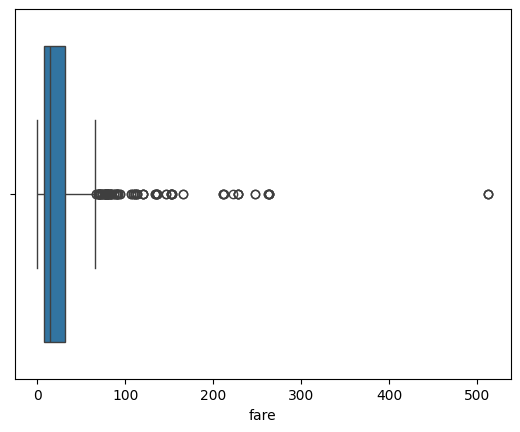

In [31]:
sns.boxplot(x=y1)
plt.show()

<b>2. Did skew or outliers impact the models?</b>  

Skew and outliers likely impacted the models. Outliers could be preprocessed in a way that effects model training less, or models could potentially be optimized to identify passengers that are likely to pay much more for fare than most other passengers.